<a href="https://colab.research.google.com/github/adarshukla3005/Stock_sentiment_analysis/blob/main/Apple_stock_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import requests
from bs4 import BeautifulSoup
import time

# Function to get FT Apple headlines
def get_ft_apple_headlines(pages=100):
    headlines = []
    base_url = "https://www.ft.com/search?q=Apple&page={}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    for page in range(1, pages + 1):
        url = base_url.format(page)
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, "html.parser")

        for item in soup.find_all('div', class_='o-teaser__content'):
            headline_tag = item.find('a', class_='js-teaser-heading-link')
            date_tag = item.find('time', class_='o-teaser__timestamp-date')

            if headline_tag and date_tag:
                headline = headline_tag.get_text().strip()
                date = date_tag.get_text().strip()
                headlines.append((headline, date))

        time.sleep(2)

    return headlines

# Fetch and print FT news headlines related to Amazon for 50 pages
ft_apple_headlines = get_ft_apple_headlines(pages=50)
for headline, date in ft_apple_headlines:
    print(f"Headline: {headline}\n Date: {date}\n")


Headline: Apple set to be first Big Tech group to face charges under EU digital law
 Date: June 14, 2024

Headline: Newspaper groups warn Apple over ad-blocking plans
 Date: May 12, 2024

Headline: Apple targets Google staff to build artificial intelligence team
 Date: April 30, 2024

Headline: Apple’s belated AI gambit
 Date: June 12, 2024

Headline: Apple overtakes Microsoft as world’s most valuable company after push into AI
 Date: June 12, 2024

Headline: Hey Siri, is Apple’s AI strategy enough to sustain this rally?
 Date: June 13, 2024

Headline: Even Apple cannot explain why we need AI in our lives
 Date: June 14, 2024

Headline: Apple shares hit record high and push valuation back above $3tn
 Date: June 11, 2024

Headline: Apple shares hit record high and push valuation back above $3tn
 Date: June 11, 2024

Headline: Apple scraps its ‘buy now, pay later’ service in the US
 Date: June 17, 2024

Headline: Apple scraps its ‘buy now, pay later’ service in the US
 Date: June 17, 202

In [7]:
import pandas as pd
df = pd.DataFrame(ft_apple_headlines, columns=['Headline',  'Date'])

In [8]:
df

,Headline,Date
0,Apple set to be first Big Tech group to face c...,"June 14, 2024"
1,Newspaper groups warn Apple over ad-blocking p...,"May 12, 2024"
2,Apple targets Google staff to build artificial...,"April 30, 2024"
3,Apple’s belated AI gambit,"June 12, 2024"
4,Apple overtakes Microsoft as world’s most valu...,"June 12, 2024"
...,...,...
986,Death and succession at Berkshire,"May 7, 2024"
987,Warner Bros and Paramount CEOs hold explorator...,"December 21, 2023"
988,Cristiano Amon: generative AI is ‘evolving ver...,"January 4, 2024"
989,Postcard from London . . . Sunday roast gets t...,"February 15, 2024"


In [9]:
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()

In [10]:
grouped_df

,Date,Headline
0,2023-02-02,Apple’s revenue growth streak ends after suppl...
1,2023-02-05,Apple blundered when it killed off Dark Sky
2,2023-02-23,Apple/Luxshare: AR deal shows growing trust in...
3,2023-02-28,Brussels narrows Apple antitrust probe | Bruss...
4,2023-03-15,Apple supplier Foxconn predicts decline in dem...
...,...,...
292,2024-06-14,Apple set to be first Big Tech group to face c...
293,2024-06-15,How real TV scandals and online abuse inspired...
294,2024-06-16,Apple supplier TDK claims solid-state battery ...
295,2024-06-17,"Apple scraps its ‘buy now, pay later’ service ..."


In [11]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# def ft_apple_headlines(pages=50):
#     headlines = []
#     base_url = "https://www.ft.com/search?q=Amazon&page={}"
#     headers = {
#         "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
#     }

#     for page in range(1, pages + 1):
#         url = base_url.format(page)
#         response = requests.get(url, headers=headers)
#         soup = BeautifulSoup(response.content, "html.parser")

#         for item in soup.find_all('div', class_='o-teaser__content'):
#             headline_tag = item.find('a', class_='js-teaser-heading-link')
#             date_tag = item.find('time', class_='o-teaser__timestamp-date')

#             if headline_tag and date_tag:
#                 headline = headline_tag.get_text().strip()
#                 date = date_tag.get_text().strip()
#                 headlines.append((headline, date))

#         time.sleep(2)

#     return headlines

# # Fetch FT news headlines related to Apple for 50 pages
# ft_amazon_headlines = get_ft_amazon_headlines(pages=50)

# Create a DataFrame
df = pd.DataFrame(ft_apple_headlines, columns=['Headline', 'Date'])

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()

# Fetch Amazon stock data using yfinance
start_date = grouped_df['Date'].min()
end_date = grouped_df['Date'].max()
amzn_data = yf.download('AMZN', start=start_date, end=end_date)

# Reset index to make 'Date' a column
amzn_data.reset_index(inplace=True)

# Merge the stock data with the grouped_df on the 'Date' column
merged_df = pd.merge(grouped_df, amzn_data, on='Date', how='left')

# Perform sentiment analysis on the headlines
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(headline):
    vs = analyzer.polarity_scores(headline)
    return vs['compound']

merged_df['Sentiment'] = merged_df['Headline'].apply(analyze_sentiment)

# Calculate daily percentage change in stock price
merged_df['Price Change'] = merged_df['Close'].pct_change()

# Display the DataFrame with sentiment scores and price changes
print(merged_df[['Date', 'Headline', 'Sentiment', 'Price Change']])

# Calculate correlation between sentiment and stock price change
correlation = merged_df[['Sentiment', 'Price Change']].corr()
print("Correlation between sentiment and stock price change:")
print(correlation)

[*********************100%%**********************]  1 of 1 completed

          Date                                           Headline  Sentiment  \
0   2023-02-02  Apple’s revenue growth streak ends after suppl...    -0.0772   
1   2023-02-05        Apple blundered when it killed off Dark Sky    -0.6705   
2   2023-02-23  Apple/Luxshare: AR deal shows growing trust in...     0.6124   
3   2023-02-28  Brussels narrows Apple antitrust probe | Bruss...     0.0000   
4   2023-03-15  Apple supplier Foxconn predicts decline in dem...     0.0772   
..         ...                                                ...        ...   
292 2024-06-14  Apple set to be first Big Tech group to face c...    -0.2869   
293 2024-06-15  How real TV scandals and online abuse inspired...    -0.6124   
294 2024-06-16  Apple supplier TDK claims solid-state battery ...     0.2500   
295 2024-06-17  Apple scraps its ‘buy now, pay later’ service ...     0.1680   
296 2024-06-18  FirstFT: Apple retreats from financial service...     0.0000   

     Price Change  
0             NaN  

In [2]:
pip install pandas yfinance vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


In [12]:
import pandas as pd
import yfinance as yf
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Fetch FT news headlines related to Apple for 50 pages
# ft_apple_headlines = get_ft_apple_headlines(pages=50)

# Create a DataFrame
# df = pd.DataFrame(ft_apple_headlines, columns=['Headline', 'Date'])

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Group by 'Date' and combine headlines
grouped_df = df.groupby('Date').agg({'Headline': ' | '.join}).reset_index()

# Fetch Apple stock data using yfinance
start_date = grouped_df['Date'].min()
end_date = grouped_df['Date'].max()
aapl_data = yf.download('AAPL', start=start_date, end=end_date)

# Reset index to make 'Date' a column
aapl_data.reset_index(inplace=True)

# Merge the stock data with the grouped_df on the 'Date' column
merged_df = pd.merge(grouped_df, aapl_data, on='Date', how='left')

# Label stock price movements
merged_df['Price Movement'] = merged_df['Close'].diff().shift(-1)
merged_df['Price Movement'] = merged_df['Price Movement'].apply(lambda x: 1 if x > 0 else 0)

# Drop rows with NaN values created by shift
merged_df = merged_df.dropna(subset=['Price Movement'])

# Perform sentiment analysis on the headlines
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(headline):
    vs = analyzer.polarity_scores(headline)
    return vs['compound']

merged_df['Sentiment'] = merged_df['Headline'].apply(analyze_sentiment)

# Display the DataFrame with sentiment scores and price movements
print(merged_df[['Date', 'Headline', 'Sentiment', 'Price Movement']])

[*********************100%%**********************]  1 of 1 completed

          Date                                           Headline  Sentiment  \
0   2023-02-02  Apple’s revenue growth streak ends after suppl...    -0.0772   
1   2023-02-05        Apple blundered when it killed off Dark Sky    -0.6705   
2   2023-02-23  Apple/Luxshare: AR deal shows growing trust in...     0.6124   
3   2023-02-28  Brussels narrows Apple antitrust probe | Bruss...     0.0000   
4   2023-03-15  Apple supplier Foxconn predicts decline in dem...     0.0772   
..         ...                                                ...        ...   
292 2024-06-14  Stockpickers: AI forces RWS to learn a new voc...    -0.2869   
293 2024-06-15  How real TV scandals and online abuse inspired...    -0.6124   
294 2024-06-16  Podcast: Martin Wolf and Raghuram Rajan on dem...     0.2500   
295 2024-06-17  The Weekly Show with Jon Stewart review — TV s...     0.1680   
296 2024-06-18  FirstFT: Apple retreats from financial service...     0.0000   

     Price Movement  
0                

**ROC** Curves

Model: Logistic Regression
Accuracy: 0.4333
Precision: 0.4449
Recall: 0.4312
F1-score: 0.4340
ROC AUC: 0.6059




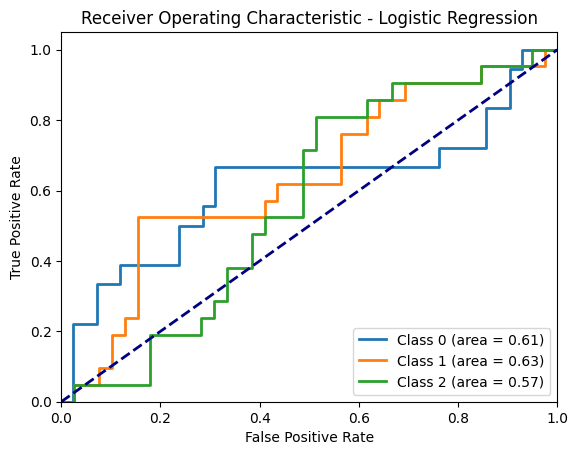

Model: Support Vector Machine
Accuracy: 0.3833
Precision: 0.4727
Recall: 0.3862
F1-score: 0.3453
ROC AUC: 0.5724




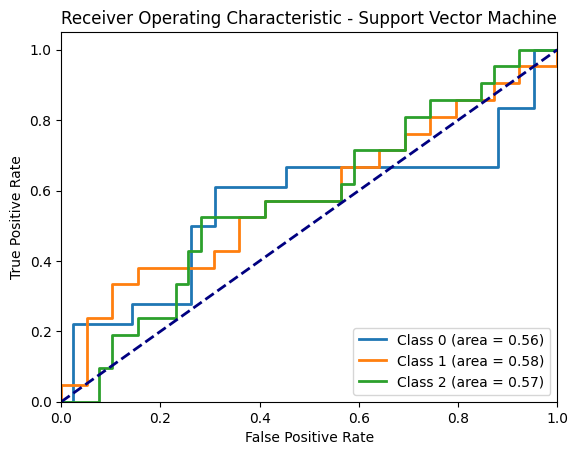

Model: Random Forest
Accuracy: 0.4500
Precision: 0.4404
Recall: 0.4392
F1-score: 0.4222
ROC AUC: 0.6277




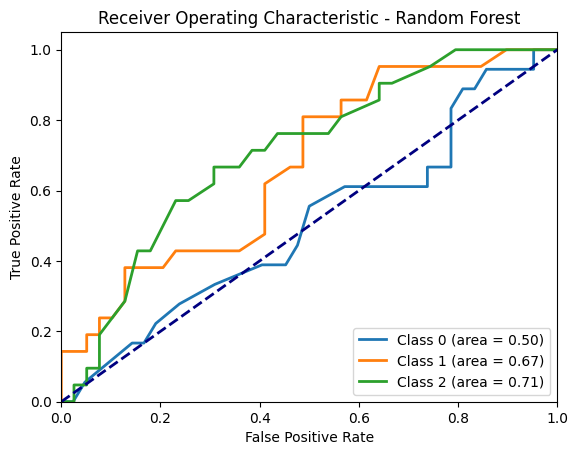

Model: Neural Network
Accuracy: 0.3833
Precision: 0.3883
Recall: 0.3836
F1-score: 0.3853
ROC AUC: 0.5849




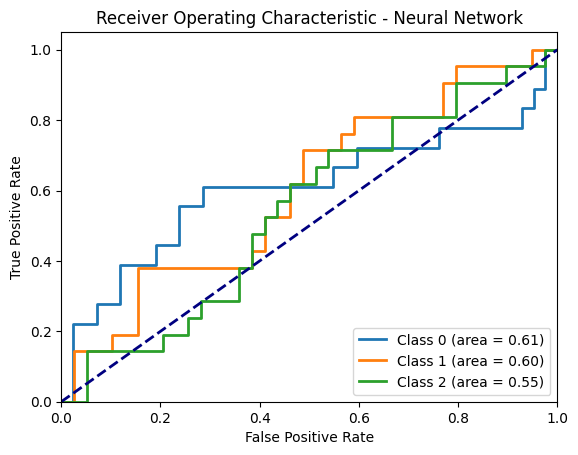

In [23]:
# Use TF-IDF Vectorizer to convert textual data to numerical data
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text = tfidf_vectorizer.fit_transform(merged_df['Headline'])

# Combine text features with sentiment score
X = pd.DataFrame(X_text.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
X['Sentiment'] = merged_df['Sentiment'].values

# Define target variable
y = merged_df['Price Movement']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier(max_iter=500)
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test) if hasattr(clf, "predict_proba") else clf.decision_function(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    if y_proba.ndim == 1:
        y_proba = y_proba.reshape(-1, 1)

    # Binarize the output labels for ROC AUC calculation
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test_binarized = lb.transform(y_test)

    if y_test_binarized.shape[1] == 1:
        y_test_binarized = np.hstack((1 - y_test_binarized, y_test_binarized))

    roc_auc = roc_auc_score(y_test_binarized, y_proba, multi_class='ovo', average='macro')

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")

    # Plot ROC curve
    fpr = {}
    tpr = {}
    roc_auc_dict = {}
    for i in range(y_test_binarized.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
        roc_auc_dict[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(y_test_binarized.shape[1]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (area = {roc_auc_dict[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {name}')
    plt.legend(loc="lower right")
    plt.show()

Buy/Sell Signals and Portfolio value over time

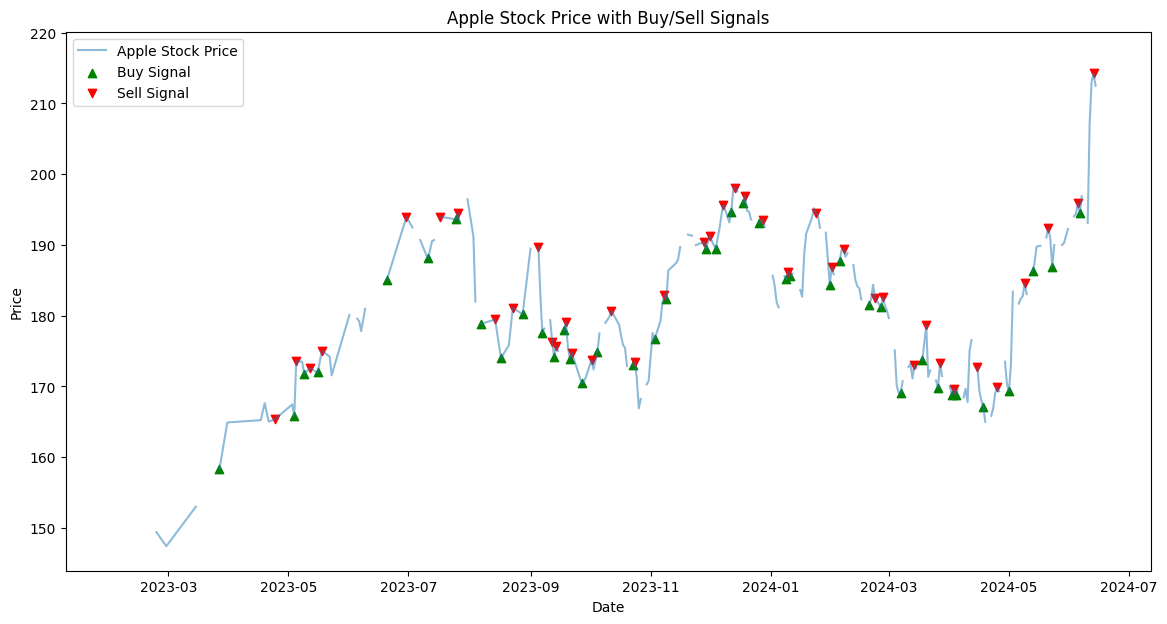

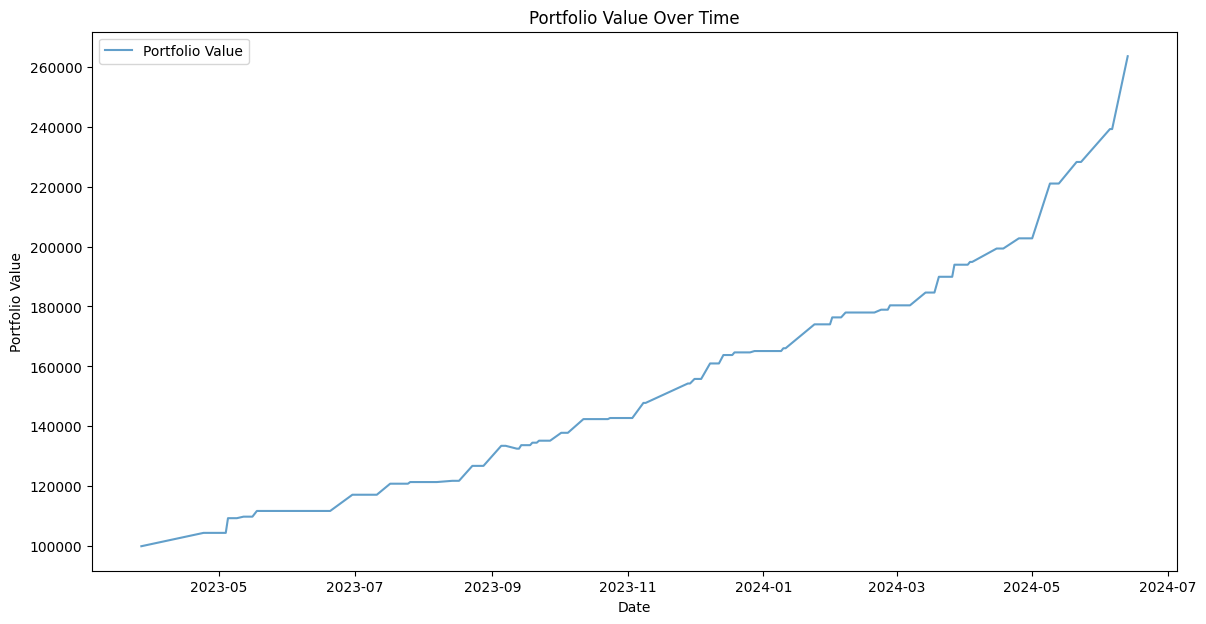

         Date Action       Price     Position  Portfolio Value
0  2023-03-27    BUY  158.279999   631.791766    100000.000000
1  2023-04-24   SELL  165.330002     0.000000    104454.133881
2  2023-05-04    BUY  165.789993   630.038833    104454.133881
3  2023-05-05   SELL  173.570007     0.000000    109355.844845
4  2023-05-09    BUY  171.770004   636.641102    109355.844845
..        ...    ...         ...          ...              ...
75 2024-05-21   SELL  192.350006     0.000000    228224.663375
76 2024-05-23    BUY  186.880005  1221.236395    228224.663375
77 2024-06-05   SELL  195.869995     0.000000    239203.566635
78 2024-06-06    BUY  194.479996  1229.964890    239203.566635
79 2024-06-13   SELL  214.240005     0.000000    263507.684882

[80 rows x 5 columns]


In [21]:
# Simulate trading strategy
initial_capital = 100000
capital = initial_capital
position = 0
portfolio = []

for i, row in merged_df.iterrows():
    if row['Signal'] == 'Increase' and position == 0:
        position = capital / row['Close']
        capital = 0
        portfolio.append((row['Date'], 'BUY', row['Close'], position, capital + position * row['Close']))
    elif row['Signal'] == 'Decrease' and position > 0:
        capital = position * row['Close']
        position = 0
        portfolio.append((row['Date'], 'SELL', row['Close'], position, capital))

portfolio_df = pd.DataFrame(portfolio, columns=['Date', 'Action', 'Price', 'Position', 'Portfolio Value'])

# Plot the stock price and buy/sell signals
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['Close'], label='Apple Stock Price', alpha=0.5)
buy_signals = portfolio_df[portfolio_df['Action'] == 'BUY']
sell_signals = portfolio_df[portfolio_df['Action'] == 'SELL']
plt.scatter(buy_signals['Date'], buy_signals['Price'], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(sell_signals['Date'], sell_signals['Price'], marker='v', color='r', label='Sell Signal', alpha=1)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stock Price with Buy/Sell Signals')
plt.legend()
plt.show()

# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(portfolio_df['Date'], portfolio_df['Portfolio Value'], label='Portfolio Value', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()

# Display the portfolio DataFrame
print(portfolio_df)

In [20]:
eww=portfolio_df.to_excel('ada.xlsx')